In [71]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import IPython.display as display
import seaborn as sns
from sklearn.preprocessing import Imputer
import scipy.stats as stats
%matplotlib inline

In [51]:
train_data=pd.read_csv('/home/ashwin/Downloads/av/train_iI26erW/train.csv'
                       ,low_memory=False)

In [52]:
train_data.shape

(300000, 333)

In [54]:
train_data.isnull().sum()

CUSTOMER_ID                    0
ACT_TYPE                       0
GENDER                        87
LEGAL_ENTITY                   0
OCCUP_ALL_NEW                  0
AGE                            0
N_CASA_MAX_BALANCE_MTD         0
N_CASA_MIN_BALANCE_MTD         0
BL_TAG                    299936
TWL_TAG                   295103
PL_TAG                    282198
AL_CNC_TAG                299423
AGRI_TAG                  299982
CE_TAG                    299999
CV_TAG                    299982
EDU_TAG                   299955
TL_TAG                    299984
OTHER_LOANS_TAG           299575
LAP_TAG                   299937
LAS_TAG                   299971
EEG_TAG                   300000
BBG_TAG                   299998
HL_TAG                    297372
GL_TAG                    299234
AL_CLOSED                 298745
PL_CLOSED                 292680
BL_CLOSED                 299952
TWL_CLOSED                297598
CV_CLOSED                 299977
LAP_CLOSED                299931
          

In [55]:
train_data.dropna(thresh=300000*0.7,axis=1,inplace=True)

In [77]:
train_data.isnull().sum()


CUSTOMER_ID                0
ACT_TYPE                   0
GENDER                     0
LEGAL_ENTITY               0
OCCUP_ALL_NEW              0
AGE                        0
N_CASA_MAX_BALANCE_MTD     0
N_CASA_MIN_BALANCE_MTD     0
CC_HOLD                    0
CC_ACTIVE                  0
DC_HOLD                    0
DC_ACTIVE                  0
COC_ELIGIBLE               0
EOP_BAL_MON_01             0
AMB_MON_04                 0
AMB_MON_01                 0
AMB_MON_02                 0
AMB_MON_03                 0
FINANCE_MON_01             0
JOBS_MON_01                0
LIFESTYLE_MON_01           0
INMON_01KET_MON_01         0
TRAVEL_MON_01              0
CHANNEL_CLICK_DISP         0
DESIGNATION_FINAL          0
TOP14_CITY                 0
TOP9_CITY                  0
PL2CC_ELIGIBLE             0
C_AMT_L3_MON_04            0
C_COUNT_L3_MON_04          0
D_COUNT_L3_MON_04          0
MAX_C_AMT_L3_MON_04        0
C_AMT_L3_MON_01            0
C_COUNT_L3_MON_01          0
D_COUNT_L3_MON

In [57]:
coloumn=list(train_data)
list_of_empty_col=[]

In [58]:
train_data.dtypes
all_coloumns=list(train_data)

In [59]:
for col in coloumn:
    if train_data[col].isnull().sum()>0:
        list_of_empty_col.append(col)

In [60]:
train_data[list_of_empty_col].dtypes

GENDER                  object
AMB_MON_04             float64
AMB_MON_02             float64
AMB_MON_03             float64
C_AMT_L3_MON_04        float64
C_COUNT_L3_MON_04      float64
D_COUNT_L3_MON_04      float64
MAX_C_AMT_L3_MON_04    float64
C_AMT_L3_MON_01        float64
C_COUNT_L3_MON_01      float64
D_COUNT_L3_MON_01      float64
MAX_C_AMT_L3_MON_01    float64
ZIP_CODE_FINAL          object
EOP_MON_02             float64
EOP_MON_03             float64
dtype: object

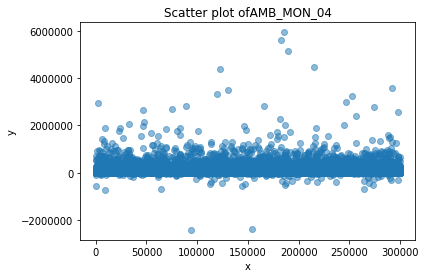

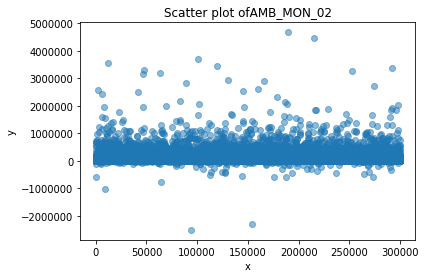

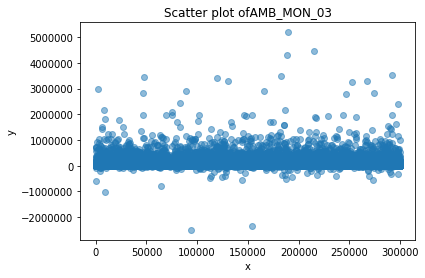

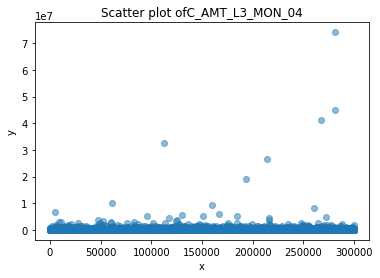

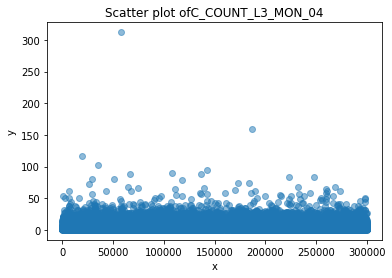

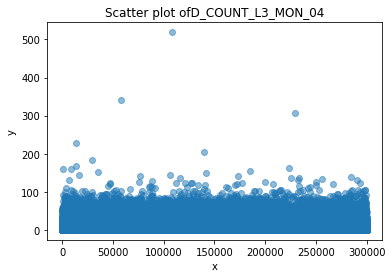

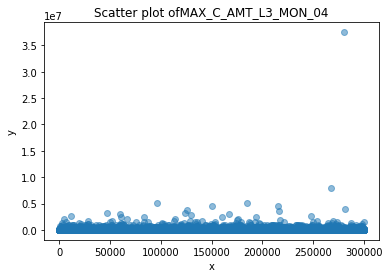

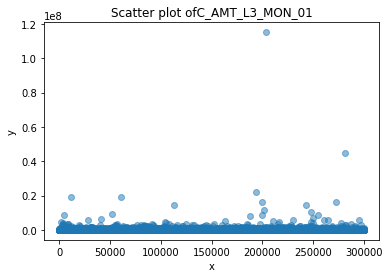

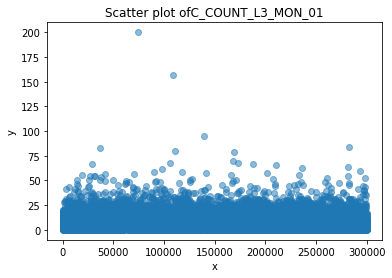

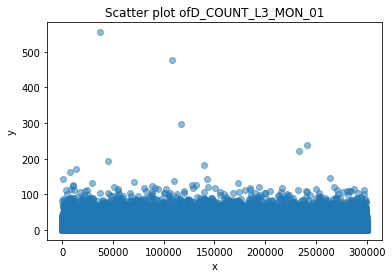

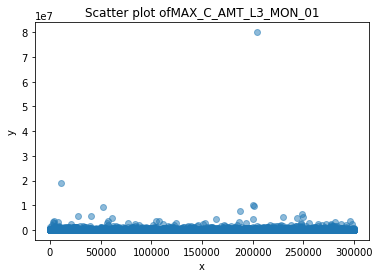

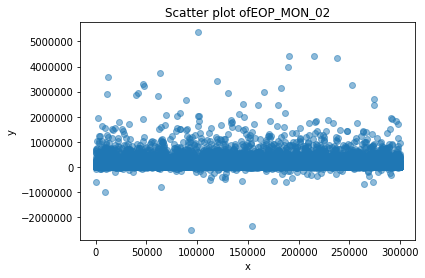

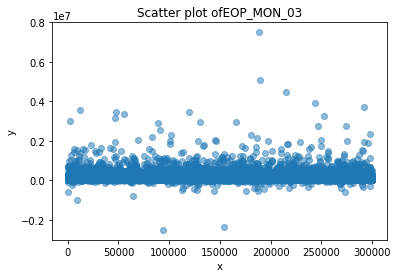

In [62]:
for col in list_of_empty_col:
    if train_data[col].dtype == 'float64':
        x = np.arange(0,300000)
        y = train_data[col]
        plt.scatter(x, y, alpha=0.5)
        plt.title('Scatter plot of'+col)
        plt.xlabel('x')
        plt.ylabel('y')
        plt.show()

In [63]:
for col in list_of_empty_col:
    if train_data[col].dtype == 'float64':
        train_data[col].fillna((train_data[col].mean()), inplace=True)
    else:
        train_data[col].fillna((train_data[col].mode()[0]), inplace=True)

In [63]:
catagorical_variables=[var for var in 
                       all_coloumns if(train_data[var].dtype=='int64' or train_data[var].dtype=='object')]
continous_variables=[var for var in all_coloumns 
                     if(var not in catagorical_variables)]

In [65]:
for col in continous_variables:
        train_data[col]=[10 if x==0 else x for x in train_data[col]]

In [ ]:
for variable in continous_variables:
    print(variable+'\t',stats.skew(train_data[variable]))

N_CASA_MAX_BALANCE_MTD	 nan
N_CASA_MIN_BALANCE_MTD	 nan
EOP_BAL_MON_01	 nan
AMB_MON_04	 nan
AMB_MON_01	 nan
AMB_MON_02	 nan
AMB_MON_03	 nan
C_AMT_L3_MON_04	 -1.7020045187715913
C_COUNT_L3_MON_04	 0.5380388605034693
D_COUNT_L3_MON_04	 -0.40786572288016876
MAX_C_AMT_L3_MON_04	 -1.7525773580731434
C_AMT_L3_MON_01	 -1.6378347343820046
C_COUNT_L3_MON_01	 0.5309509502564251
D_COUNT_L3_MON_01	 -0.32210579540479545
MAX_C_AMT_L3_MON_01	 -1.689079283157862
EOP_MON_02	 nan
EOP_MON_03	 nan
SCRUB_EMI	 1.360782454609257


/home/ashwin/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:926: RuntimeWarning: invalid value encountered in subtract
  a_zero_mean = a - np.expand_dims(np.mean(a, axis), axis)


In [67]:
train_data[continous_variables]=np.log1p(train_data[continous_variables])

/home/ashwin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log1p
  """Entry point for launching an IPython kernel.
/home/ashwin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log1p
  """Entry point for launching an IPython kernel.


In [44]:
for col in list(train_data):
    if train_data[col].dtype == 'float64':
        train_data[col].fillna((train_data[col].mean()), inplace=True)

In [76]:
train_data.dropna(axis=0,inplace=True)

In [69]:
train_data['N_CASA_MAX_BALANCE_MTD']

0          2.397895
1          9.017334
2         10.185504
3         11.096171
4         10.010634
5          6.112708
6          4.902456
7          4.156850
8         11.531018
9          9.925310
10         2.397895
11         9.210588
12        11.288766
13        11.918112
14         2.397895
15        11.782144
16         9.052924
17         2.397895
18         9.258039
19         3.627004
20         9.070260
21        10.851980
22         3.618993
23        11.133495
24         2.397895
25         9.778821
26        10.093989
27         9.675143
28        11.336875
29        11.038813
            ...    
299970     9.976547
299971     8.758164
299972    11.150548
299973     6.021023
299974     1.583094
299975     2.397895
299976     4.835488
299977     9.935825
299978     3.945071
299979    14.040091
299980     2.397895
299981     9.699718
299982     8.695053
299983     5.206641
299984     9.186564
299985     8.883101
299986     8.329899
299987     2.397895
299988     9.404467
